<a href="https://colab.research.google.com/github/vinthegreat84/geochemistry/blob/master/geochemistry_YRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  import matplotlib
  %matplotlib inline
  import pandas as pd
  import numpy as np
  import geopandas as gpd
  import matplotlib.pyplot as plt
except ImportError:
  !pip install --upgrade geopandas
  !pip install --upgrade pyshp
  !pip install --upgrade shapely
  !pip install --upgrade descartes
  !pip install unzip

  import matplotlib
  %matplotlib inline
  import pandas as pd
  import numpy as np
  import geopandas as gpd
  import matplotlib.pyplot as plt

In [ ]:
link = 'https://raw.githubusercontent.com/vinthegreat84/geochemistry/master/SedWeather-YRB/Master/Table/YRS_location.csv'
df = pd.read_csv(link, index_col=1)

In [ ]:
df.head()

,River/Tributary,Latitude,Longitude,Na2O,MgO,Al2O3,SiO2,P2O5,K2O,CaO,...,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu
Sample ID,,,,,,,,,,,,,,,,,,,,,
YRS-171,Yamuna,30.999707,78.462885,2.11,2.05,12.13,69.54,0.09,2.19,1.63,...,3.396,0.714,2.947,0.566,4.105,1.078,2.946,0.530,2.900,0.427
YRS-170,Yamuna,30.974968,78.437435,1.86,1.73,11.77,69.66,0.09,2.13,1.53,...,14.226,2.105,14.673,3.008,24.258,6.488,18.137,3.238,17.806,2.504
YRS-155A,Yamuna,30.792144,78.134485,1.93,1.22,7.79,81.36,0.05,1.61,1.45,...,3.844,0.597,3.169,0.488,2.794,0.662,1.689,0.278,1.460,0.199
YRS-4,Yamuna,30.429893,77.644896,0.65,1.35,5.58,83.74,0.06,1.22,2.11,...,1.128,0.189,0.977,0.147,1.032,0.253,0.688,0.122,0.672,0.097
YRS-169A,Tributary,30.972665,78.431855,0.63,5.53,10.94,62.64,0.16,1.72,1.59,...,2.268,0.540,2.090,0.339,2.155,0.490,1.217,0.183,0.903,0.108


In [ ]:
df.shape

(39, 33)

In [ ]:
df.columns

Index(['River/Tributary', 'Latitude', 'Longitude', 'Na2O', 'MgO', 'Al2O3',
       'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3', 'SUM', 'L.O.I.',
       'L.O.I. AT 110', 'Ba', 'Cr', 'V', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu',
       'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'],
      dtype='object')

Normalization

In [ ]:
# df_norm = df.drop(columns=['River/Tributary','Latitude','Longitude','Fe2O3','SUM','L.O.I.','L.O.I. AT 110'])
df_norm_major = df[['SiO2','TiO2','Al2O3','MnO','MgO','CaO','Na2O','K2O','P2O5']]
df_norm_ree = df[['La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']]

,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu
Sample ID,,,,,,,,,,,,,,
YRS-171,15.594,33.154,3.887,23.941,3.396,0.714,2.947,0.566,4.105,1.078,2.946,0.530,2.900,0.427
YRS-170,103.451,219.404,21.700,124.491,14.226,2.105,14.673,3.008,24.258,6.488,18.137,3.238,17.806,2.504


In [ ]:
# composite
link = 'https://raw.githubusercontent.com/vinthegreat84/geochemistry/master/composite.csv'
df_comp = pd.read_csv(link, index_col=0)

In [ ]:
df_comp.head(2)

,category,subcategory,subsubcategory,reference,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,...,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu
sample,,,,,,,,,,,,,,,,,,,,,
UCC-1,composite,upper_continental_crust,UCC,Clarke (1889),60.2,0.57,15.27,1.61,5.97,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UCC-2,composite,upper_continental_crust,UCC,Clarke and Washington (1924),60.3,1.07,15.65,1.50,5.50,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_comp.shape

(57, 44)

In [ ]:
df_comp.columns

Index(['category', 'subcategory', 'subsubcategory', 'reference', 'SiO2',
       'TiO2', 'Al2O3', 'Fe2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O',
       'P2O5', 'CO2', 'Ti', 'V', 'Cr', 'Co', 'Ni', 'Rb', 'Zr', 'Nb', 'Cs',
       'Ba', 'Hf', 'Ta', 'Pb', 'Th', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu'],
      dtype='object')

In [ ]:
# df_comp = df_comp.drop(columns=['category','subcategory','subsubcategory','reference','Fe2O3','FeO','CO2'])
df_comp_major = df_comp[['SiO2','TiO2','Al2O3','MnO','MgO','CaO','Na2O','K2O','P2O5']]
df_comp_ree = df_comp[['La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']]

In [ ]:
df_comp_major.index

Index(['UCC-1', 'UCC-2', 'UCC-3', 'UCC-4', 'UCC-5', 'UCC-6', 'UCC-7', 'UCC-8',
       'UCC-9', 'UCC-10', 'UCC-11', 'UCC-12', 'UCC-13', 'Dunite',
       'Harzburgite', 'Peridotite', 'Lherzolite', 'Anorthosite', 'Gabbro',
       'Basalt', 'Tholeiite', 'Andesite', 'Dacite', 'Tonalite',
       'Diorite_and_Granodiorite_quartz_diorite',
       'Granodiorite_and_quartz_monzodiorite', 'Rhyolite', 'Granite',
       'Trachyte', 'Syenite', 'Nepheline_syenite', 'Phonolite',
       'Quartz_arenite', 'Lithic_arenite', 'Graywacke', 'Arkose',
       'Average_sandstone', 'SCo-1', 'BCR-1', 'BCR-2', 'shale', 'IAS', 'IPAS',
       'River Suspended', 'Loess', 'NASC', 'PAAS', 'Russian Shale', 'Condie',
       'GLOSS', 'PM Mud', 'AM Mud', 'Tillite', 'Condie Sandstone',
       'Condie Greywacke', 'PM Sand', 'AM Sand'],
      dtype='object', name='sample')

In [ ]:
# UCC normalization after Taylor and McLennan, 1985, 1995
df_norm_major_ucc = df_norm_major / df_comp_major.loc['UCC-10']
df_norm_major_paas = df_norm_major / df_comp_major.loc['PAAS']

# PAAS normalization after Nance and Taylor, 1976; McLennan, 1981, 1989, 2009; Taylor and McLennan, 1985, 2009; Barth et al., 2000; Haskin and Haskin, 1966
df_norm_ree_ucc = df_norm_ree / df_comp_ree.loc['UCC-10']
df_norm_ree_paas = df_norm_ree / df_comp_ree.loc['PAAS']

In [ ]:
# data export
df_norm_major_ucc.to_csv('df_norm_major_ucc.csv',index=False)
df_norm_major_paas.to_csv('df_norm_major_paas.csv',index=False)
df_norm_ree_ucc.to_csv('df_norm_ree_ucc.csv',index=False)
df_norm_ree_paas.to_csv('df_norm_ree_paas.csv',index=False)

In [ ]:
# generating row 'mean' value of all the columns
df_norm_major_ucc.loc['mean'] = df_norm_major_ucc.mean()
df_norm_major_paas.loc['mean'] = df_norm_major_paas.mean()

df_norm_ree_ucc.loc['mean'] = df_norm_ree_ucc.mean()
df_norm_ree_paas.loc['mean'] = df_norm_ree_paas.mean()

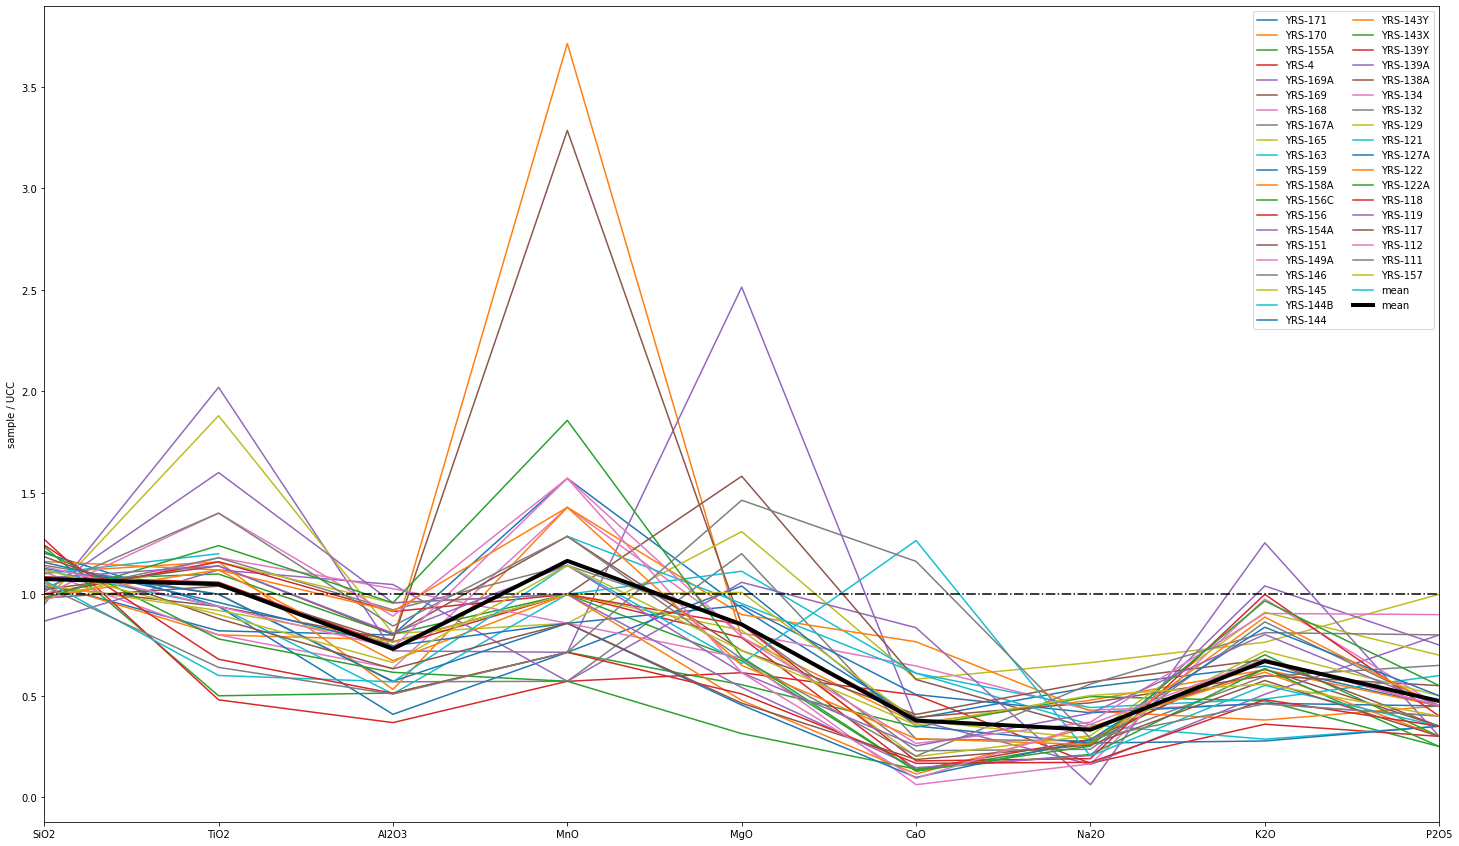

In [ ]:
# UCC normalized plot for major oxides
df_norm_major_ucc.T.plot(figsize=(25, 15))
df_norm_major_ucc.loc['mean'].T.plot(color="black", lw=4)
plt.axhline(y = 1, color = 'k', linestyle = '-.')

plt.margins(x=0)
plt.ylabel('sample / UCC')
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=2)
# plt.xticks(df_norm_ucc.index, df_norm_ucc.index, rotation=90)

plt.savefig('norm_major_ucc.pdf')
plt.savefig('norm_major_ucc.svg')
plt.savefig('norm_major_ucc.eps')
plt.show()

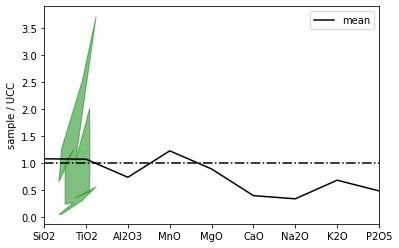

In [ ]:
# Customized UCC normalized plot for major oxides
# df_norm_major_ucc.T.plot(figsize=(25, 15))
df_norm_major_ucc.loc['mean'].T.plot(color="black")
plt.axhline(y = 1, color = 'k', linestyle = '-.')
plt.fill_between(df_norm_major_ucc.loc['mean'], df_norm_major_ucc.max(), df_norm_major_ucc.min(), color='green', alpha=0.5)

plt.margins(x=0)
plt.ylabel('sample / UCC')
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=2)
# plt.xticks(df_norm_ucc.index, df_norm_ucc.index, rotation=90)

plt.savefig('cust_norm_major_ucc.pdf')
plt.savefig('cust_norm_major_ucc.svg')
plt.savefig('cust_norm_major_ucc.eps')
plt.show()

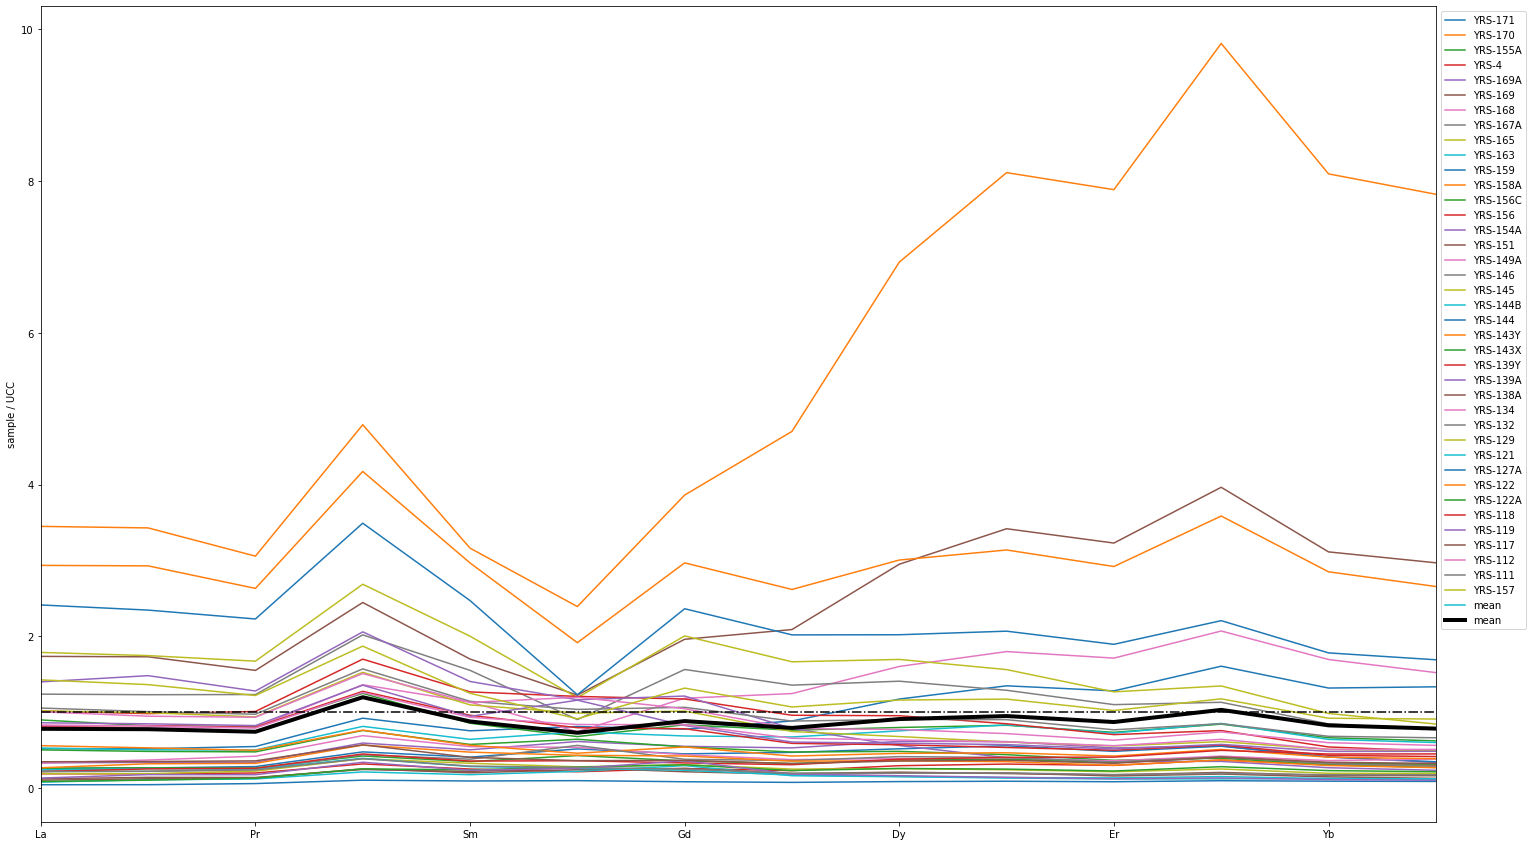

In [ ]:
# UCC normalized plot for trace elements and REEs
df_norm_ree_ucc.T.plot(figsize=(25, 15))
df_norm_ree_ucc.loc['mean'].T.plot(color="black", lw=4)
plt.axhline(y = 1, color = 'k', linestyle = '-.')

plt.margins(x=0)
plt.ylabel('sample / UCC')
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=1)
# plt.xticks(df_norm_ucc.index, df_norm_ucc.index, rotation=90)

plt.savefig('norm_ree_ucc.pdf')
plt.savefig('norm_ree_ucc.svg')
plt.savefig('norm_ree_ucc.eps')
plt.show()

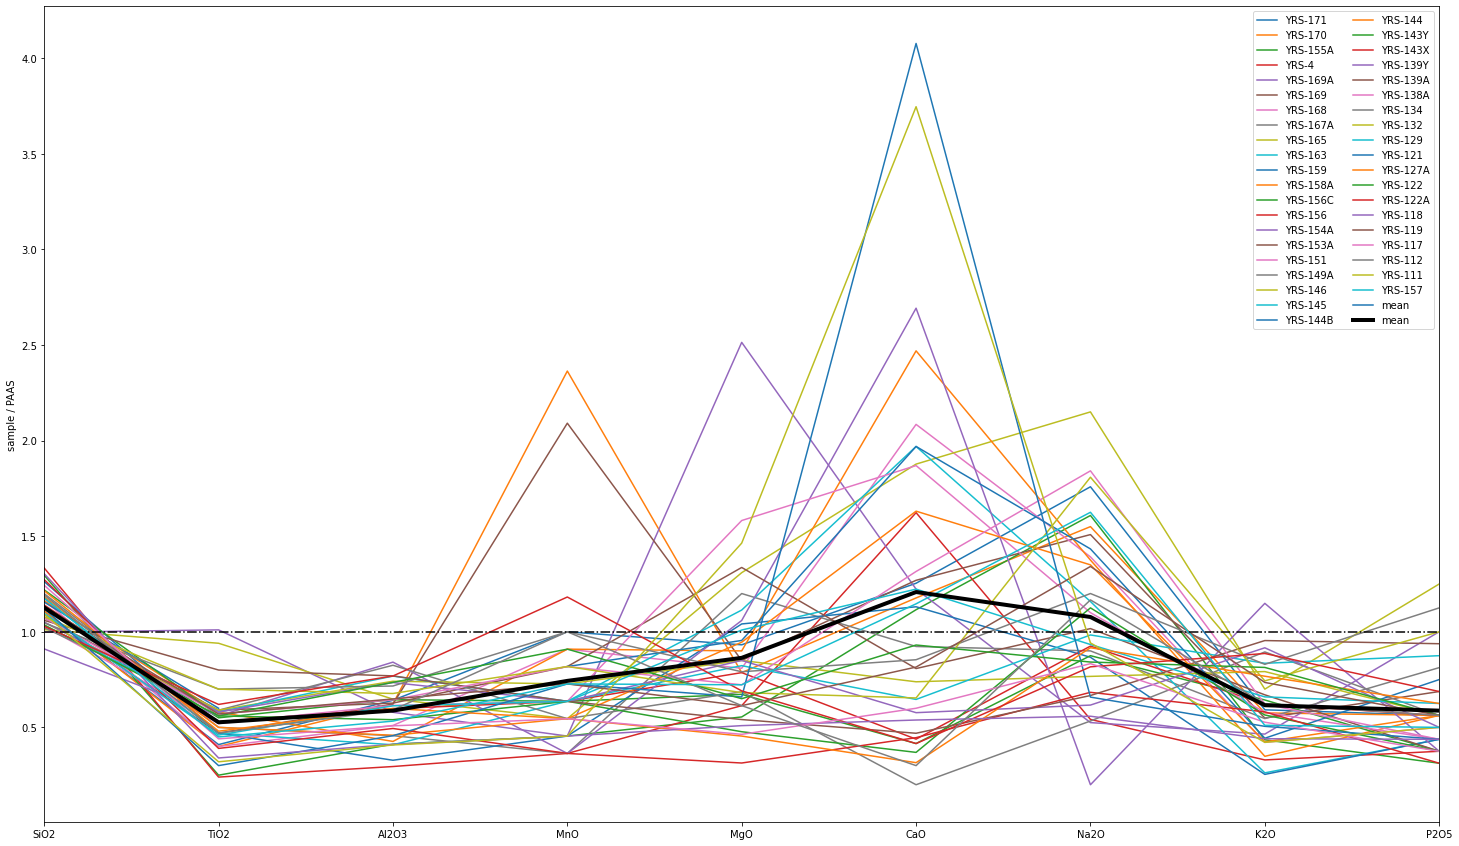

In [ ]:
# PAAS normalized plot for major oxides
df_norm_major_paas.T.plot(figsize=(25, 15))
df_norm_major_paas.loc['mean'].T.plot(color="black", lw=4)
plt.axhline(y = 1, color = 'k', linestyle = '-.')

plt.margins(x=0)
plt.ylabel('sample / PAAS')
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=2)
# plt.xticks(df_norm_paas.index, df_norm_paas.index, rotation=90)

plt.savefig('norm_major_paas.pdf')
plt.savefig('norm_major_paas.svg')
plt.savefig('norm_major_paas.eps')
plt.show()

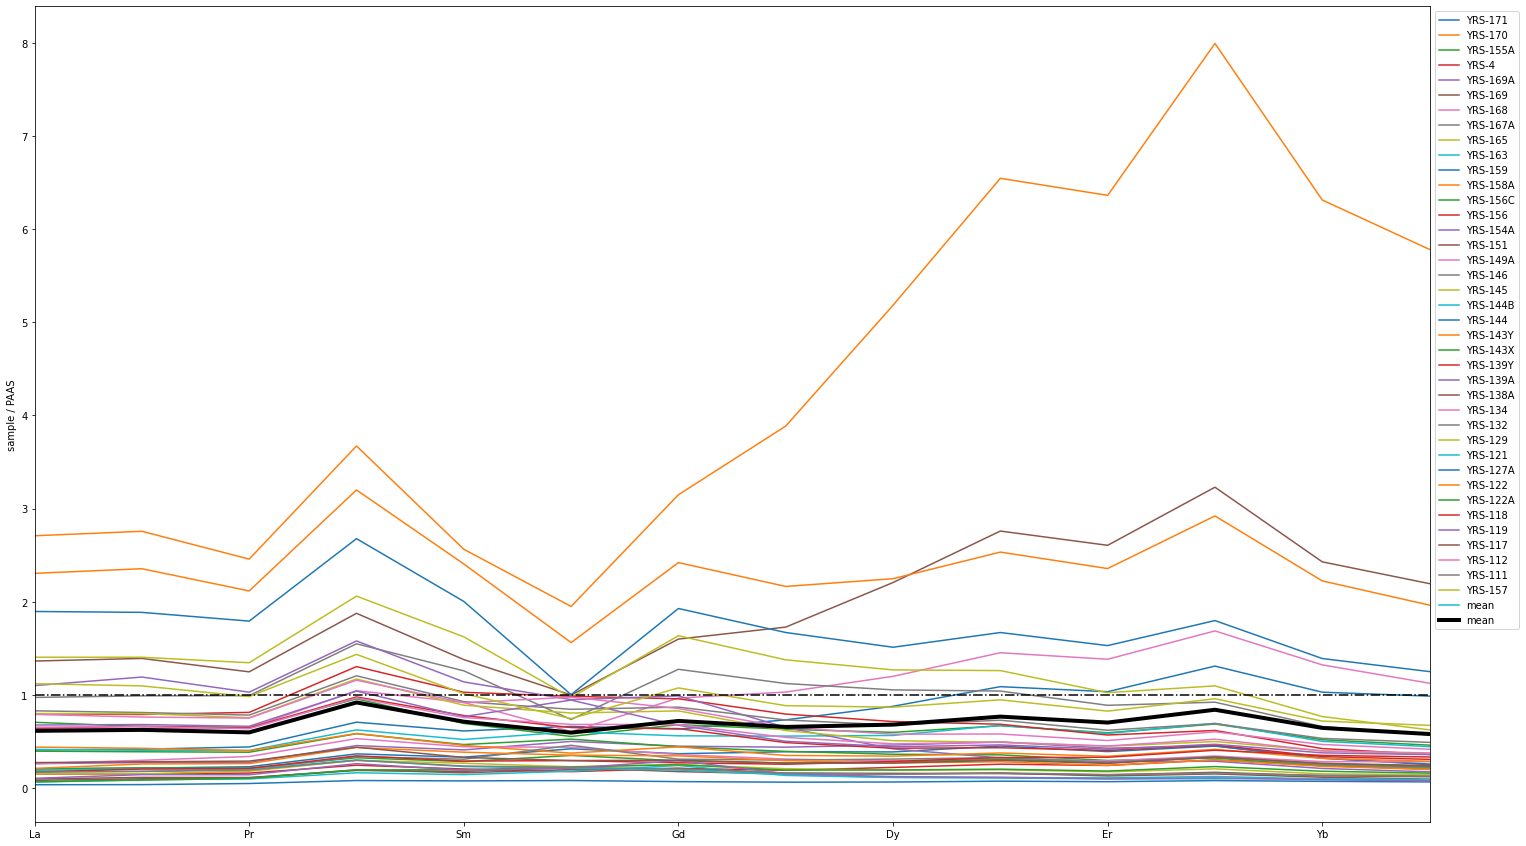

In [ ]:
# PAAS normalized plot for major oxides
df_norm_ree_paas.T.plot(figsize=(25, 15))
df_norm_ree_paas.loc['mean'].T.plot(color="black", lw=4)
plt.axhline(y = 1, color = 'k', linestyle = '-.')

plt.margins(x=0)
plt.ylabel('sample / PAAS')
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=1)
# plt.xticks(df_norm_ree_paas.index, df_norm_ree_paas.index, rotation=90)

plt.savefig('norm_ree_paas.pdf')
plt.savefig('norm_ree_paas.svg')
plt.savefig('norm_ree_paas.eps')
plt.show()

In [ ]:
# sandstone normalization after McLennan, 1993
df_norm_sand = df_norm_major / df_comp_major.loc['Graywacke']
df_norm_sand.head()

,SiO2,TiO2,Al2O3,MnO,MgO,CaO,Na2O,K2O,P2O5
Sample ID,,,,,,,,,
YRS-171,1.042579,0.683333,0.898519,1.1,0.976190,0.652,0.727586,1.095,0.45
YRS-170,1.044378,0.666667,0.871852,2.6,0.823810,0.612,0.641379,1.065,0.45
YRS-155A,1.219790,0.416667,0.577037,0.5,0.580952,0.580,0.665517,0.805,0.25
YRS-4,1.255472,0.400000,0.413333,0.4,0.642857,0.844,0.224138,0.610,0.30
YRS-169A,0.939130,1.683333,0.810370,0.5,2.633333,0.636,0.217241,0.860,0.80


In [ ]:
# generating row 'mean' having mean value of all the columns
df_norm_sand.loc['mean'] = df_norm_sand.mean()

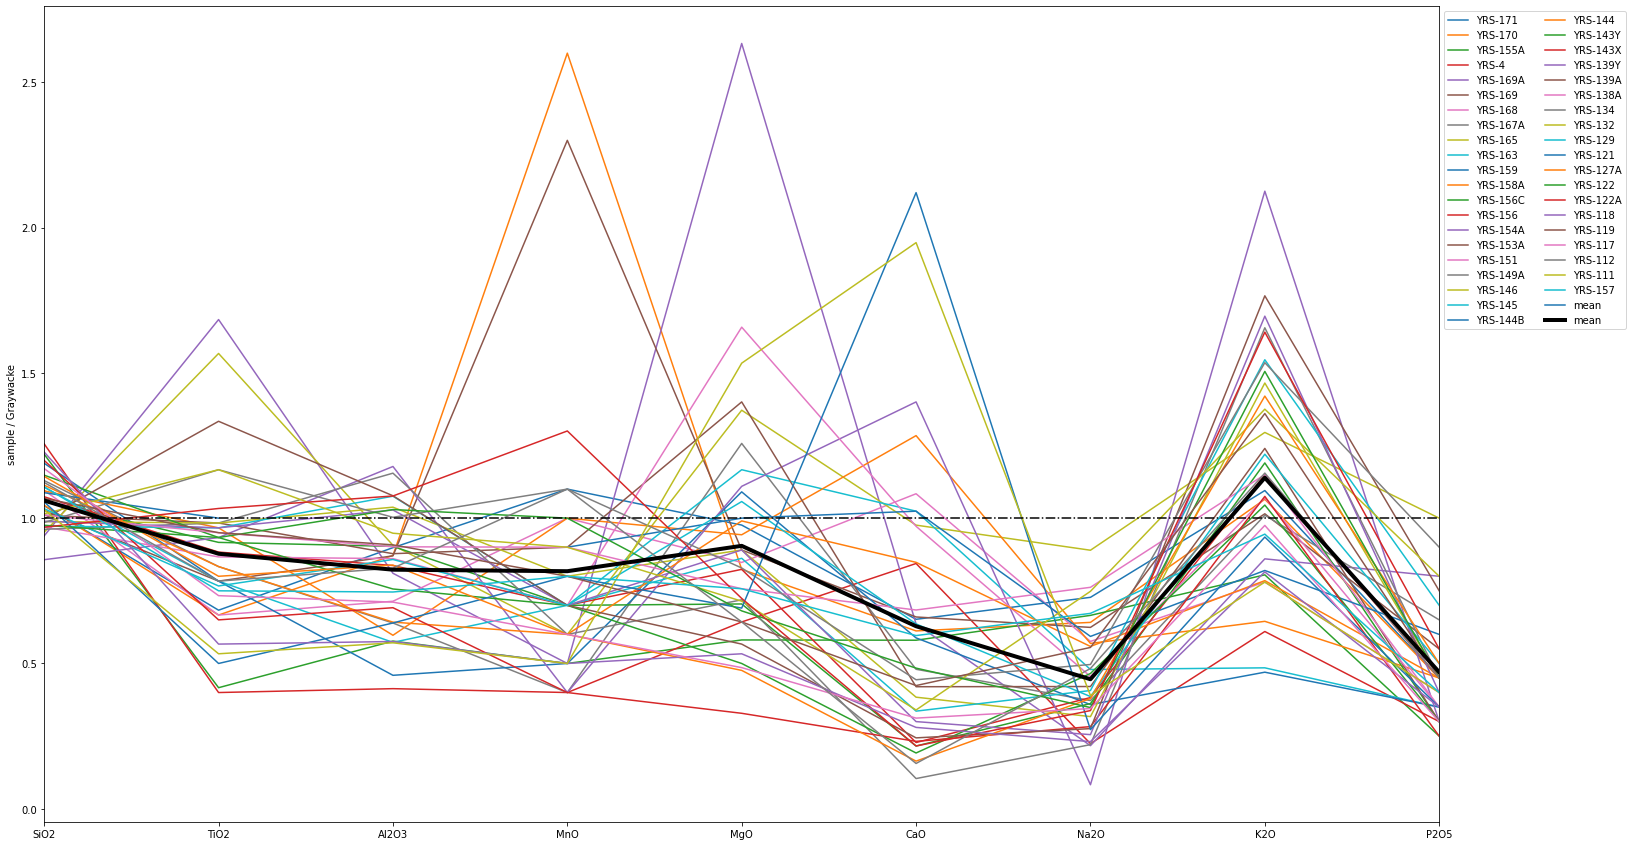

In [ ]:
df_norm_sand.T.plot(figsize=(25, 15))
df_norm_sand.loc['mean'].T.plot(color="black", lw=4)
plt.axhline(y = 1, color = 'k', linestyle = '-.')

plt.margins(x=0)
plt.ylabel('sample / Graywacke')
plt.legend(loc='best', bbox_to_anchor=(1, 1), ncol=2)
# plt.xticks(df_norm_sand.index, df_norm_sand.index, rotation=90)

plt.savefig('norm_graywacke.pdf')
plt.savefig('norm_graywacke.svg')
plt.savefig('norm_graywacke.eps')
plt.show()

Map

In [ ]:
# indian states
link = 'https://raw.githubusercontent.com/nikhilkumarsingh/choropleth-python-tutorial/master/states_india.geojson'
india_states = gpd.read_file(link)

In [ ]:
type(india_states)

geopandas.geodataframe.GeoDataFrame

In [ ]:
india_states.head(2)

,cartodb_id,state_code,st_nm,geometry
0,1,0,Telangana,"MULTIPOLYGON (((78.34088 19.88361, 78.35133 19..."
1,2,35,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."


In [ ]:
india_states.st_nm.unique

<bound method Series.unique of 0                    Telangana
1     Andaman & Nicobar Island
2               Andhra Pradesh
3           Arunanchal Pradesh
4                        Assam
5                        Bihar
6                 Chhattisgarh
7                  Daman & Diu
8                          Goa
9                      Gujarat
10                     Haryana
11            Himachal Pradesh
12             Jammu & Kashmir
13                   Jharkhand
14                   Karnataka
15                      Kerala
16                 Lakshadweep
17              Madhya Pradesh
18                 Maharashtra
19                     Manipur
20                  Chandigarh
21                  Puducherry
22                      Punjab
23                   Rajasthan
24                      Sikkim
25                  Tamil Nadu
26                     Tripura
27               Uttar Pradesh
28                 Uttarakhand
29                 West Bengal
30                      Odisha
31      

In [ ]:
# indian rivers
link = 'https://raw.githubusercontent.com/india-in-data/waterways/master/ind_waterways.json'
india_rivers = gpd.read_file(link)

In [ ]:
india_rivers.head(2)

,id,geometry
0,0,"LINESTRING (77.57797 34.59068, 77.51358 34.588..."
1,1,"LINESTRING (76.70791 34.43046, 76.64027 34.49819)"


In [ ]:
# sample locations
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [ ]:
gdf.head(2)

,River/Tributary,Latitude,Longitude,Na2O,MgO,Al2O3,SiO2,P2O5,K2O,CaO,TiO2,MnO,Fe2O3,SUM,L.O.I.,L.O.I. AT 110,Ba,Cr,V,geometry
Sample ID,,,,,,,,,,,,,,,,,,,,
YRS-171,Yamuna,30.999707,78.462885,2.11,2.05,12.13,69.54,0.09,2.19,1.63,0.41,0.11,5.57,95.83,5.57,2.97,602,57,62,POINT (78.46288 30.99971)
YRS-170,Yamuna,30.974968,78.437435,1.86,1.73,11.77,69.66,0.09,2.13,1.53,0.40,0.26,7.46,96.89,5.75,3.41,437,123,54,POINT (78.43743 30.97497)


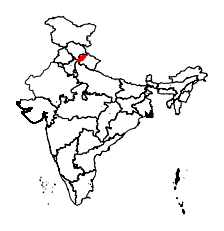

In [ ]:
from matplotlib.lines import MarkerStyle
ax = india_states.plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='RED', markersize=5)

plt.axis('off')
plt.savefig('map.pdf', bbox_inches='tight')
plt.savefig('map.svg', bbox_inches='tight')
plt.savefig('map.eps', bbox_inches='tight')
plt.show()

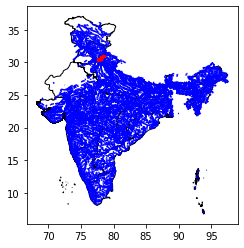

In [ ]:
from matplotlib.lines import MarkerStyle
ax = india_states.plot(color='white', edgecolor='black', zorder=0)

# We can now plot our ``GeoDataFrame``.
india_rivers.plot(ax=ax, color='BLUE', zorder=1)
gdf.plot(ax=ax, color='RED', markersize=5, zorder=2)

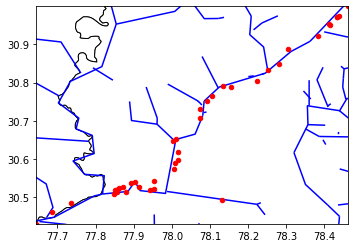

In [ ]:
from matplotlib.lines import MarkerStyle
ax = india_states.plot(color='white', edgecolor='black', zorder=0)

# We can now plot our ``GeoDataFrame``.
india_rivers.plot(ax=ax, color='BLUE', zorder=1)
gdf.plot(ax=ax, color='RED', markersize=20, zorder=2)

ax.set_xlim(gdf.Longitude.min(), gdf.Longitude.max())
ax.set_ylim(gdf.Latitude.min(), gdf.Latitude.max())

# plt.axis('off')
plt.savefig('map_zoom.pdf', bbox_inches='tight')
plt.savefig('map_zoom.svg', bbox_inches='tight')
plt.savefig('map_zoom.eps', bbox_inches='tight')
plt.show()

Sample location

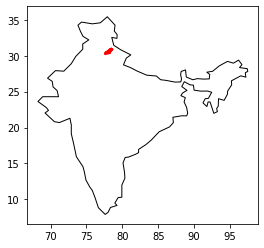

In [ ]:
from matplotlib.lines import MarkerStyle
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.name == 'India'].plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='RED', markersize=5)

plt.savefig('map.pdf')
plt.savefig('map.svg')
plt.savefig('map.eps')
plt.show()

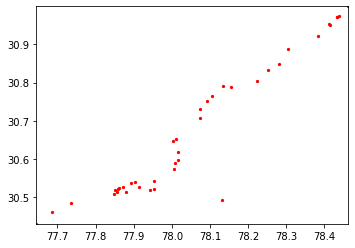

In [ ]:
from matplotlib.lines import MarkerStyle
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world[world.name == 'India'].plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='RED', markersize=5)
ax.set_xlim(gdf.Longitude.min(), gdf.Longitude.max())
ax.set_ylim(gdf.Latitude.min(), gdf.Latitude.max())

plt.savefig('map_zoom.pdf')
plt.savefig('map_zoom.svg')
plt.savefig('map_zoom.eps')
plt.show()

Variation map

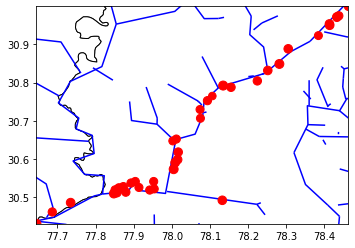

In [ ]:
from matplotlib.lines import MarkerStyle
ax = india_states.plot(color='white', edgecolor='black', zorder=0)

# We can now plot our ``GeoDataFrame``.
india_rivers.plot(ax=ax, color='BLUE', zorder=1)
gdf.plot(ax=ax, color='RED', markersize='SiO2', zorder=2)

ax.set_xlim(gdf.Longitude.min(), gdf.Longitude.max())
ax.set_ylim(gdf.Latitude.min(), gdf.Latitude.max())

plt.savefig('map_SiO2.pdf')
plt.savefig('map_SiO2.svg')
plt.savefig('map_SiO2.eps')
plt.show()

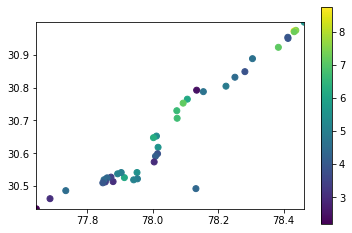

In [ ]:
from matplotlib.lines import MarkerStyle
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax = world.plot(color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(column='Fe2O3', ax=ax, cmap='viridis', legend=True)
ax.set_xlim(gdf.Longitude.min(), gdf.Longitude.max())
ax.set_ylim(gdf.Latitude.min(), gdf.Latitude.max())

plt.savefig('map_Fe2O3.pdf')
plt.savefig('map_Fe2O3.svg')
plt.savefig('map_Fe2O3.eps')
plt.show()

Customized plots

In [ ]:
# composite
link = 'https://raw.githubusercontent.com/vinthegreat84/geochemistry/master/SedWeather-YRB/proxy_location.csv'
df_proxy = pd.read_csv(link, index_col=0)

In [ ]:
df_proxy.head(2)

,category,subcategory,subsubcategory,reference,(CIW),(CIW*),(CPA),(CIA),(PIA),(CIX),...,CaO,TiO2,MnO,Fe2O3,SUM,L.O.I.,L.O.I. AT 110,Ba,Cr,V
sample,,,,,,,,,,,,,,,,,,,,,
YRS-171,sample,Yamuna,river,this study,63.599961,0.777506,77.750582,56.568830,58.433524,67.494876,...,1.63,0.41,0.11,5.57,95.83,5.57,2.97,602,57,62
YRS-170,sample,Yamuna,river,this study,65.791729,0.793667,79.366720,58.280584,60.730746,68.687765,...,1.53,0.40,0.26,7.46,96.89,5.75,3.41,437,123,54


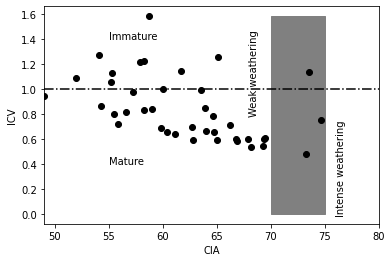

In [ ]:
# CIA-ICV
from matplotlib.patches import Rectangle

fig = plt.figure()
ax = fig.add_subplot()

x = df_proxy['(CIA)']
y = df_proxy['(ICV)']

plt.axhline(y = 1, color = 'k', linestyle = '-.')

rect = matplotlib.patches.Rectangle((70, 0),
                                     5, df_proxy['(ICV)'].max(),
                                     color ='gray')
ax.add_patch(rect)

plt.text(55, 1.4, 'Immature')
plt.text(55, 0.4, 'Mature')
plt.text(68, 0.8, 'Weak weathering', rotation=90)
plt.text(76, 0, 'Intense weathering', rotation=90)

plt.plot(x, y, 'o', color='k')

plt.xlabel("CIA")
plt.ylabel("ICV")
plt.xlim(df_proxy['(CIA)'].min(), 80)

plt.savefig('CIA-ICV.pdf', bbox_inches='tight')
plt.savefig('CIA-ICV.svg', bbox_inches='tight')
plt.savefig('CIA-ICV.eps', bbox_inches='tight')
plt.show()

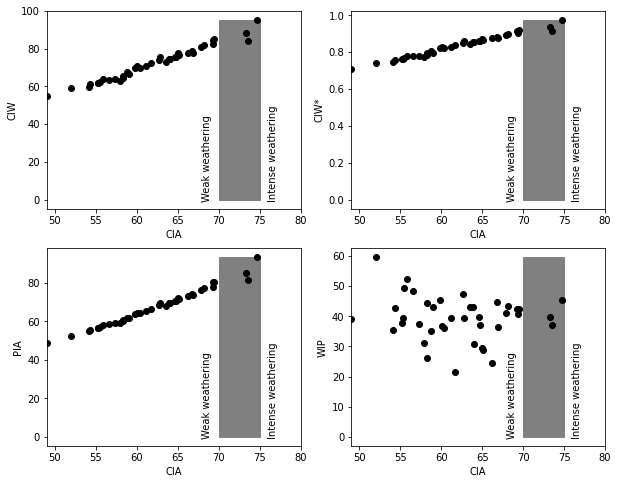

In [ ]:
# CIA-WI
from matplotlib.patches import Rectangle

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(221)

x = df_proxy['(CIA)']
y = df_proxy['(CIW)']

rect = matplotlib.patches.Rectangle((70, 0),5, df_proxy['(CIW)'].max(),color ='gray')
ax.add_patch(rect)

plt.text(68, 0, 'Weak weathering', rotation=90)
plt.text(76, 0, 'Intense weathering', rotation=90)

plt.plot(x, y, 'o', color='k')

plt.xlabel("CIA")
plt.ylabel("CIW")
plt.xlim(df_proxy['(CIA)'].min(), 80)


ax = fig.add_subplot(222)

x = df_proxy['(CIA)']
y = df_proxy['(CIW*)']

rect = matplotlib.patches.Rectangle((70, 0),5, df_proxy['(CIW*)'].max(),color ='gray')
ax.add_patch(rect)

plt.text(68, 0, 'Weak weathering', rotation=90)
plt.text(76, 0, 'Intense weathering', rotation=90)

plt.plot(x, y, 'o', color='k')

plt.xlabel("CIA")
plt.ylabel("CIW*")
plt.xlim(df_proxy['(CIA)'].min(), 80)


ax = fig.add_subplot(223)

x = df_proxy['(CIA)']
y = df_proxy['(PIA)']

rect = matplotlib.patches.Rectangle((70, 0),5, df_proxy['(PIA)'].max(),color ='gray')
ax.add_patch(rect)

plt.text(68, 0, 'Weak weathering', rotation=90)
plt.text(76, 0, 'Intense weathering', rotation=90)

plt.plot(x, y, 'o', color='k')

plt.xlabel("CIA")
plt.ylabel("PIA")
plt.xlim(df_proxy['(CIA)'].min(), 80)


ax = fig.add_subplot(224)

x = df_proxy['(CIA)']
y = df_proxy['(WIP)']

rect = matplotlib.patches.Rectangle((70, 0),5, df_proxy['(WIP)'].max(),color ='gray')
ax.add_patch(rect)

plt.text(68, 0, 'Weak weathering', rotation=90)
plt.text(76, 0, 'Intense weathering', rotation=90)

plt.plot(x, y, 'o', color='k')

plt.xlabel("CIA")
plt.ylabel("WIP")
plt.xlim(df_proxy['(CIA)'].min(), 80)

plt.savefig('CIA-WI.pdf', bbox_inches='tight')
plt.savefig('CIA-WI.svg', bbox_inches='tight')
plt.savefig('CIA-WI.eps', bbox_inches='tight')
plt.show()

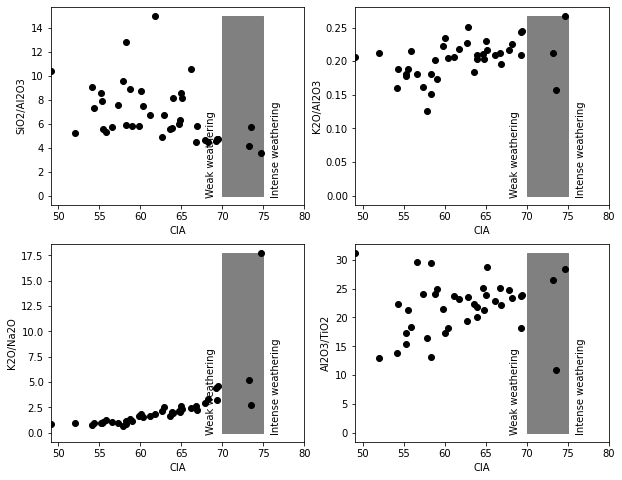

In [ ]:
# CIA-ratio
from matplotlib.patches import Rectangle

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(221)

x = df_proxy['(CIA)']
y = df_proxy['SiO2/Al2O3']

rect = matplotlib.patches.Rectangle((70, 0),5, df_proxy['SiO2/Al2O3'].max(),color ='gray')
ax.add_patch(rect)

plt.text(68, 0, 'Weak weathering', rotation=90)
plt.text(76, 0, 'Intense weathering', rotation=90)

plt.plot(x, y, 'o', color='k')

plt.xlabel("CIA")
plt.ylabel("SiO2/Al2O3")
plt.xlim(df_proxy['(CIA)'].min(), 80)


ax = fig.add_subplot(222)

x = df_proxy['(CIA)']
y = df_proxy['K2O/Al2O3']

rect = matplotlib.patches.Rectangle((70, 0),5, df_proxy['K2O/Al2O3'].max(),color ='gray')
ax.add_patch(rect)

plt.text(68, 0, 'Weak weathering', rotation=90)
plt.text(76, 0, 'Intense weathering', rotation=90)

plt.plot(x, y, 'o', color='k')

plt.xlabel("CIA")
plt.ylabel("K2O/Al2O3")
plt.xlim(df_proxy['(CIA)'].min(), 80)


ax = fig.add_subplot(223)

x = df_proxy['(CIA)']
y = df_proxy['K2O/Na2O']

rect = matplotlib.patches.Rectangle((70, 0),5, df_proxy['K2O/Na2O'].max(),color ='gray')
ax.add_patch(rect)

plt.text(68, 0, 'Weak weathering', rotation=90)
plt.text(76, 0, 'Intense weathering', rotation=90)

plt.plot(x, y, 'o', color='k')

plt.xlabel("CIA")
plt.ylabel("K2O/Na2O")
plt.xlim(df_proxy['(CIA)'].min(), 80)


ax = fig.add_subplot(224)

x = df_proxy['(CIA)']
y = df_proxy['Al2O3/TiO2']

rect = matplotlib.patches.Rectangle((70, 0),5, df_proxy['Al2O3/TiO2'].max(),color ='gray')
ax.add_patch(rect)

plt.text(68, 0, 'Weak weathering', rotation=90)
plt.text(76, 0, 'Intense weathering', rotation=90)

plt.plot(x, y, 'o', color='k')

plt.xlabel("CIA")
plt.ylabel("Al2O3/TiO2")
plt.xlim(df_proxy['(CIA)'].min(), 80)

plt.savefig('CIA-ratio.pdf', bbox_inches='tight')
plt.savefig('CIA-ratio.svg', bbox_inches='tight')
plt.savefig('CIA-ratio.eps', bbox_inches='tight')
plt.show()

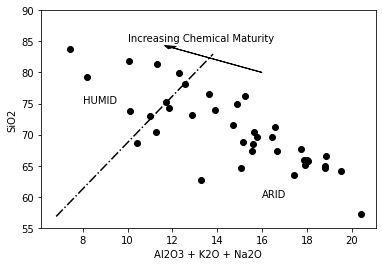

In [ ]:
# SiO2-AKN
fig = plt.figure()
ax = fig.add_subplot()

x = df_proxy['Al2O3']+df_proxy['K2O']+df_proxy['Na2O']
y = df_proxy['SiO2']

plt.plot(x, y, 'o', color='k')

# overlays after Suttner and Dutta, 1986
x1 = [6.817718940936862, 13.813645621181266]
y1 = [56.83046683046683, 82.960687960687965]
plt.plot(x1, y1, '-.', color = 'k')

plt.text(8, 75, 'HUMID')
plt.text(16, 60, 'ARID')
plt.text(10, 85, 'Increasing Chemical Maturity')
plt.arrow(16, 80, -4, 4, head_width=0.5, head_length=0.5, color='black')

plt.xlabel("Al2O3 + K2O + Na2O")
plt.ylabel("SiO2")
plt.ylim(55, 90)

plt.savefig('Si-AKN.pdf', bbox_inches='tight')
plt.savefig('Si-AKN.svg', bbox_inches='tight')
plt.savefig('Si-AKN.eps', bbox_inches='tight')
plt.show()

Tectonic setting

In [ ]:
# function of intersection of lines 
from __future__ import division 

def line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

def intersection(L1, L2):
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = Dx / D
        y = Dy / D
        return x,y
    else:
        return False

In [ ]:
L1 = line([-6,-3], [6,4.8])
L2 = line([-6,1.5], [6,-4.3])

R = intersection(L1, L2)
(x,y) = R  

KeyError: ignored

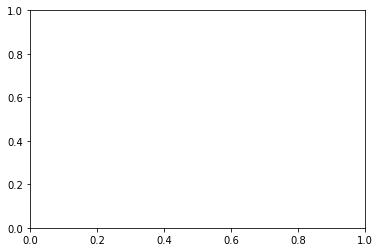

In [ ]:
# Bhatia, 1983
# DF1-DF2

fig = plt.figure()
ax = fig.add_subplot()

DF1 = -0.0447*df['SiO2'] - 0.972*df['TiO2'] + 0.008*df['Al2O3'] - 0.267*df['Fe2O3'] + 0.208*df['FeO'] - 3.082*df['MnO'] + 0.140*df['MgO'] + 0.195*df['CaO'] 
+ 0.719*df['Na2O'] - 0.032*df['K2O'] + 7.510*df['P2O5'] + 0.303

DF2 = -0.4210*df['SiO2'] + 1.988*df['TiO2'] - 0.526*df['Al2O3'] - 0.551*df['Fe2O3'] - 1.610*df['FeO'] + 2.720*df['MnO'] + 0.881*df['MgO'] - 0.907*df['CaO']
- 0.177*df['Na2O'] - 1.840*df['K2O'] + 7.244*df['P2O5'] + 43.570

plt.plot(DF1, DF2, 'o', color='k')

# overlays after Rollinson, 1993
x_X, y_X = -6 , -3
x_Y, y_Y = 1.6, 6
x_Z, y_Z = 4.6, -6

L1 = line([x_X, y_X], [6,4.8]) # line XB
L2 = line([3.5,-6], [-0.5,6]) # line BC

R = intersection(L1, L2)
(x_B,y_B) = R

x0 = [x_X, x_B]
y0 = [y_X, y_B]
plt.plot(x0, y0, '-', color = 'k') # segment XB

L1 = line([-6,1.5], [6,-4.3]) # line AC
L2 = line([x_X, y_X], [6,4.8]) # line XB

R = intersection(L1, L2)
(x_A,y_A) = R

L1 = line([-6,1.5], [6,-4.3]) # line AC
L2 = line([3.5,-6], [-0.5,6]) # line BC

R = intersection(L1, L2)
(x_C,y_C) = R

x0 = [x_B, x_C]
y0 = [y_B, y_C]
plt.plot(x0, y0, '-', color = 'k') # segment BC

x0 = [x_A, x_C]
y0 = [y_A, y_C]
plt.plot(x0, y0, '-', color = 'k') # segment AC

x0 = [x_B, x_Y]
y0 = [y_B, y_Y]
plt.plot(x0, y0, '-', color = 'k') # segment BY

x0 = [x_C, x_Z]
y0 = [y_C, y_Z]
plt.plot(x0, y0, '-', color = 'k') # segment CZ

plt.text(-3, 3, 'Passive margin')
plt.text(-3, -4, 'Active continental margin')
plt.text(-1, -1, 'Continental island'+ "\n"+'-arc')
plt.text(2.5, 1.5, 'Oceanic island-arc')

plt.xlabel("DF1")
plt.ylabel("DF2")
plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.savefig('DF1-DF2(Bhatia, 1983).pdf', bbox_inches='tight')
plt.savefig('DF1-DF2(Bhatia, 1983).svg', bbox_inches='tight')
plt.savefig('DF1-DF2(Bhatia, 1983).eps', bbox_inches='tight')
plt.show()

In [ ]:
# Bhatia, 1983
# Fe2O3+MgO -TiO2

In [ ]:
# Bhatia, 1983
# Fe2O3+MgO -Al2O3/SiO2

In [ ]:
# Roser and Korsch, 1986
# SiO2-log(K2O/Na2O)

In [ ]:
# Roser and Korsch, 1988
# DF1-DF2

In [ ]:
# Roser and Korsch, 1988
# DF1-DF2 (oxide ratio)

In [ ]:
# Verma and Armstrong-Altrin, 2013
# Low silica (>63%) sediment
# DF1-DF2


In [ ]:
df_proxy.columns

Index(['category', 'subcategory', 'subsubcategory', 'reference', '(CIW)',
       '(CIW*)', '(CPA)', '(CIA)', '(PIA)', '(CIX)', '(ICV)', '(V)', '(STI)',
       '(SF)', '(R)', '(WIP)', 'SiO2/Al2O3', 'K2O/Al2O3', 'K2O/Na2O',
       'Al2O3/TiO2', 'Latitude', 'Longitude', 'Na2O', 'MgO', 'Al2O3', 'SiO2',
       'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3', 'SUM', 'L.O.I.',
       'L.O.I. AT 110', 'Ba', 'Cr', 'V'],
      dtype='object')

In [ ]:
df_proxy_adjust = df_proxy[['category', 'subcategory', 'subsubcategory', 'reference', 'Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3', 'SUM']]
df_proxy_adjust.head()

,category,subcategory,subsubcategory,reference,Na2O,MgO,Al2O3,SiO2,P2O5,K2O,CaO,TiO2,MnO,Fe2O3,SUM
sample,,,,,,,,,,,,,,,
YRS-171,sample,Yamuna,river,this study,2.11,2.05,12.13,69.54,0.09,2.19,1.63,0.41,0.11,5.57,95.83
YRS-170,sample,Yamuna,river,this study,1.86,1.73,11.77,69.66,0.09,2.13,1.53,0.40,0.26,7.46,96.89
YRS-155A,sample,Yamuna,river,this study,1.93,1.22,7.79,81.36,0.05,1.61,1.45,0.25,0.05,2.46,98.17
YRS-4,sample,Yamuna,river,this study,0.65,1.35,5.58,83.74,0.06,1.22,2.11,0.24,0.04,2.18,97.17
YRS-169A,sample,Yamuna,tributary,this study,0.63,5.53,10.94,62.64,0.16,1.72,1.59,1.01,0.05,8.75,93.02


In [ ]:
# adjusting oxides to 100%
oxide = list(df_proxy_adjust[['Na2O', 'MgO', 'Al2O3', 'SiO2', 'P2O5', 'K2O', 'CaO', 'TiO2', 'MnO', 'Fe2O3', 'SUM']])

for oxide in df_proxy_adjust.columns[4:]:
    df_proxy_adjust[oxide] = df_proxy_adjust[oxide]/df_proxy_adjust['SUM']*100

df_proxy_adjust.drop(['SUM'], axis=1, inplace=True)
df_proxy_adjust.head()    

<ipython-input-81-a4fcb25d8803>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_proxy_adjust[oxide] = df_proxy_adjust[oxide]/df_proxy_adjust['SUM']*100
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,category,subcategory,subsubcategory,reference,Na2O,MgO,Al2O3,SiO2,P2O5,K2O,CaO,TiO2,MnO,Fe2O3
sample,,,,,,,,,,,,,,
YRS-171,sample,Yamuna,river,this study,2.201816,2.139205,12.657832,72.566002,0.093916,2.285297,1.700929,0.427841,0.114787,5.812376
YRS-170,sample,Yamuna,river,this study,1.919703,1.785530,12.147796,71.895964,0.092889,2.198369,1.579110,0.412839,0.268346,7.699453
YRS-155A,sample,Yamuna,river,this study,1.965977,1.242742,7.935214,82.876643,0.050932,1.640012,1.477030,0.254660,0.050932,2.505857
YRS-4,sample,Yamuna,river,this study,0.668931,1.389318,5.742513,86.178862,0.061747,1.255532,2.171452,0.246990,0.041165,2.243491
YRS-169A,sample,Yamuna,tributary,this study,0.677274,5.944958,11.760912,67.340357,0.172006,1.849065,1.709310,1.085788,0.053752,9.406579


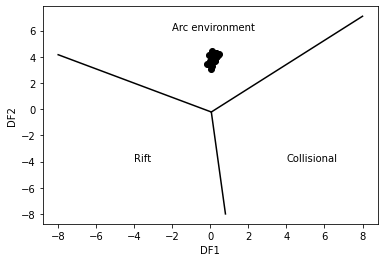

In [ ]:
# Verma and Armstrong-Altrin, 2013
# High silica (<63%) sediment
# DF1-DF2

fig = plt.figure()
ax = fig.add_subplot()

DF1 = -0.26269*np.log(df_proxy_adjust['TiO2']/df_proxy_adjust['SiO2']) + 0.60369*np.log(df_proxy_adjust['Al2O3']/df_proxy_adjust['SiO2'])
-0.72489*np.log(df_proxy_adjust['Fe2O3']/df_proxy_adjust['SiO2']) + 0.66042*np.log(df_proxy_adjust['MnO']/df_proxy_adjust['SiO2'])
+2.19128*np.log(df_proxy_adjust['MgO']/df_proxy_adjust['SiO2']) + 0.14421*np.log(df_proxy_adjust['CaO']/df_proxy_adjust['SiO2'])
-1.30432*np.log(df_proxy_adjust['Na2O']/df_proxy_adjust['SiO2']) + 0.05449*np.log(df_proxy_adjust['K2O']/df_proxy_adjust['SiO2'])
-0.33002*np.log(df_proxy_adjust['P2O5']/df_proxy_adjust['SiO2']) + 1.58815

DF2 = -1.19586*np.log(df_proxy_adjust['TiO2']/df_proxy_adjust['SiO2']) + 1.06399*np.log(df_proxy_adjust['Al2O3']/df_proxy_adjust['SiO2'])
+0.30341*np.log(df_proxy_adjust['Fe2O3']/df_proxy_adjust['SiO2']) + 0.43567*np.log(df_proxy_adjust['MnO']/df_proxy_adjust['SiO2'])
+0.83805*np.log(df_proxy_adjust['MgO']/df_proxy_adjust['SiO2']) - 0.40665*np.log(df_proxy_adjust['CaO']/df_proxy_adjust['SiO2'])
+1.02140*np.log(df_proxy_adjust['Na2O']/df_proxy_adjust['SiO2']) - 1.70582*np.log(df_proxy_adjust['K2O']/df_proxy_adjust['SiO2'])
-0.12643*np.log(df_proxy_adjust['P2O5']/df_proxy_adjust['SiO2']) - 1.06801

plt.plot(DF1, DF2, 'o', color='k')

# overlays after Rollinson, 2014
# Central point (0.051, −0.220), Arc–Col (8, 7.090), Col– Rift (0.794, −8), Rift–Arc (−8, 4.153)
x0 = [0.051, 8]
y0 = [-0.220, 7.090]
plt.plot(x0, y0, '-', color = 'k')

x0 = [0.051, 0.794]
y0 = [-0.220, -8]
plt.plot(x0, y0, '-', color = 'k')

x0 = [0.051, -8]
y0 = [-0.220, 4.153]
plt.plot(x0, y0, '-', color = 'k')

plt.text(-2, 6, 'Arc environment')
plt.text(4, -4, 'Collisional')
plt.text(-4, -4, 'Rift')

plt.xlabel("DF1")
plt.ylabel("DF2")

plt.savefig('DF1-DF2(Verma and Armstrong-Altrin, 2013).pdf', bbox_inches='tight')
plt.savefig('DF1-DF2(Verma and Armstrong-Altrin, 2013).svg', bbox_inches='tight')
plt.savefig('DF1-DF2(Verma and Armstrong-Altrin, 2013).eps', bbox_inches='tight')
plt.show()